<a href="https://colab.research.google.com/github/gawankarsanket/dswithchirag_assignments/blob/main/DS_Chirag_Assignment_TimeSeries_Netflix_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NETFLIX STOCK PRICE TIMESERIES ANALYSIS

## This dataset provides Stockprice values -Open , close, high, low and traded volume  over past few years.

## Here our objective is to analyse variation of close price over the timeseries and forcast the closing price for next 30 days

In [34]:
#Import Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
# Reading dataset
df=pd.read_csv("/content/NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
...,...,...,...,...,...,...,...
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700


## As our objective is to analyse closing price , we dont need other columns for now.

In [36]:
df_closing=df[['Date','Close']]

df_closing.head(15)

,Date,Close
0,2015-12-16,122.639999
1,2015-12-17,122.510002
2,2015-12-18,118.019997
3,2015-12-21,116.629997
4,2015-12-22,116.239998
5,2015-12-23,118.160004
6,2015-12-24,117.330002
7,2015-12-28,117.110001
8,2015-12-29,119.120003
9,2015-12-30,116.709999


In [37]:
df_closing.isnull().sum()

#so no null values

Date     0
Close    0
dtype: int64

In [38]:
df_closing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1007 non-null   object 
 1   Close   1007 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [39]:
#Convert date columns as date type

df_closing['Date']=pd.to_datetime(df_closing['Date'])
df_closing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1007 non-null   datetime64[ns]
 1   Close   1007 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.9 KB


<ipython-input-39-368b01d6a0d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closing['Date']=pd.to_datetime(df_closing['Date'])


In [40]:
#Set date column as index so that easy to understande further

df_closing.set_index('Date',inplace=True)
df_closing.head()

,Close
Date,
2015-12-16,122.639999
2015-12-17,122.510002
2015-12-18,118.019997
2015-12-21,116.629997
2015-12-22,116.239998


In [41]:
df_closing.shape

(1007, 1)

#EDA

## 1. Summary Statistics
## 2. Compute summary statistics such as mean, median, mode, standard deviation.
## 3. Visualize the Time Series Data Plot the Time Series data
## 4. Plot the rolling mean and rolling standard deviation of the Time Series data.
## 5. Stationarity Check Check for stationarity. Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test. Check for Autocorrelation
## 6. Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

In [42]:
#Summary Statistics
df_closing.describe()

,Close
count,1007.000000
mean,226.670159
std,103.203785
min,82.790001
25%,125.514999
50%,198.000000
75%,325.220001
max,418.970001


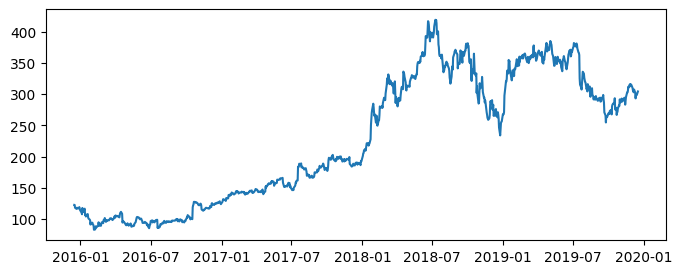

In [43]:
#Visualise time series

plt.figure(figsize=(8, 3))
plt.plot(df_closing)



#From the graph we can see, trend, also there are  highs and lows.
# will break them down using decompose method shortly.


(array([207., 137.,  97.,  81.,  11.,  71., 130., 108., 144.,  21.]),
 array([ 82.790001, 116.408001, 150.026001, 183.644001, 217.262001,
        250.880001, 284.498001, 318.116001, 351.734001, 385.352001,
        418.970001]),
 <BarContainer object of 10 artists>)

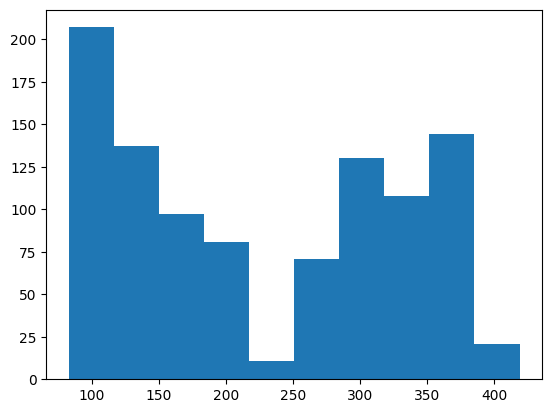

In [44]:
plt.hist(df_closing)

## from the line graph , we see that from 2016 to 2018 price was running between 100 to 200.
## the same is interpreted in hist plot. maximum times (200 times) price was withing range of 100 to 200


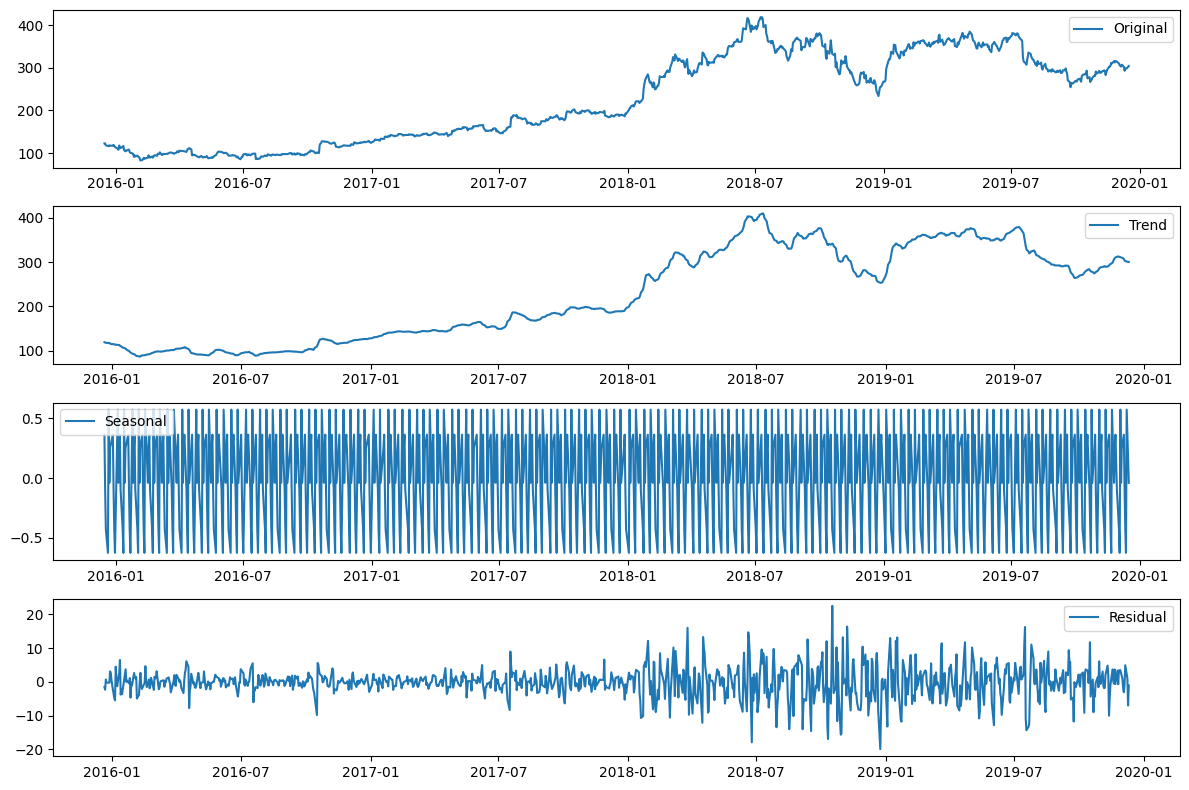

In [45]:
#Line graph shows timeseries has some trend
# there are  highs and lows. Some seasonality might be there.
#not returnig to same value and similar pattern after long period , hence no cycles
# This can also be validated using Decompose method and see the trend seasonality etc.

# We need to remove this trend and seasonality and make the series stationery



# Perform seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_closing, model='additive', period=7)

"""
model='multiplicative' if Seasonality amplitude is incresing or decreasing use
multiplicative
if amplitude remains constant use 'additive'

Period=7    assuming seasoniliy repeats after every 7 day
some repition moght be there at every 7 days

"""

# Plot the original time series and its components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_closing['Close'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


## Stationarity Check

### Here we will create a function as we may need to keep checking this again and again

In [64]:
def check_stationarity(ts):

  # Graphical check
  rolmean=ts.rolling(5).mean()
  rolstd=ts.rolling(5).std()
  plt.figure(figsize=(8, 4))
  plt.xlabel('Year')
  plt.ylabel('Closing price')
  plt.plot(ts,label='Original Time Series')
  plt.plot(rolmean,label='Rolling Mean (5 days)', color='orange')
  plt.plot(rolstd,label='Rolling Std (5 days)', color='green')
  plt.legend()  #based on label provided in plt.plot

  # Statistical check
  # ADF(dicky fullar test)
  from statsmodels.tsa.stattools import adfuller
  adft=adfuller(ts)
  print(pd.Series(adft[0:4],index=["test stats","p-value","lag","data points"]))


test stats       -1.075910
p-value           0.724582
lag               5.000000
data points    1001.000000
dtype: float64


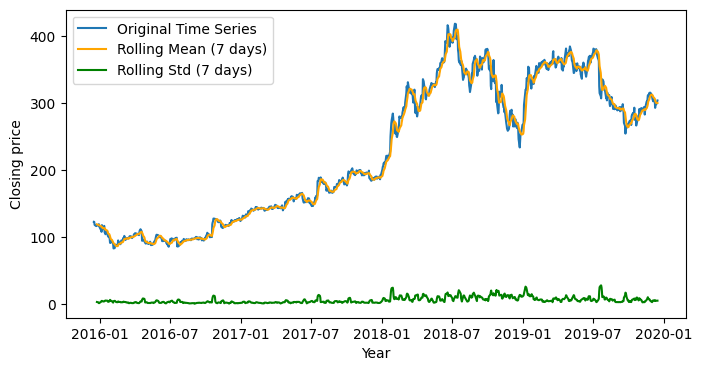

In [47]:
check_stationarity(df_closing)

### From above graph, the mean and STD are changing/moving with time. Hence Timeseries is not stationary

### Dicky Fullar Test
### P-value < 0.05 Reject Null Hypotheis-- Time Series Stationery
### P-value > 0.05 accept Null Hypotheis-- Time Series Non Stationery

test stats       -0.971463
p-value           0.763530
lag               5.000000
data points    1001.000000
dtype: float64


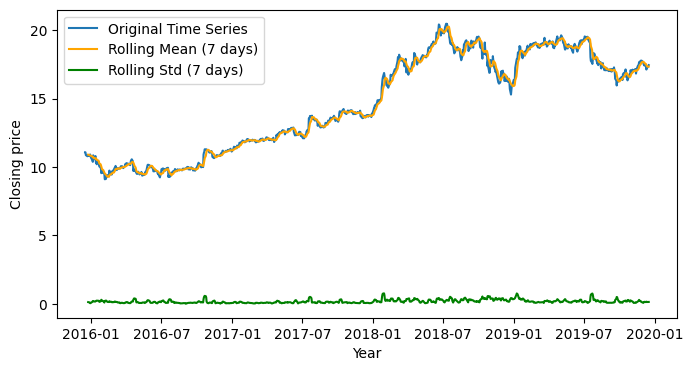

In [48]:
# sqrt transformation

df_sqrt_scaled = np.sqrt(df_closing)

check_stationarity(df_sqrt_scaled)

### Here Log,sqrt,cbrt transformation is unable to converge to stationery mean and STD. Hence we go for diff method.
### will use diff of 5 days. markte runs 5 days a week . also NAN value will fill with 0 in order to retain shape of original dataset

test stats      -5.410083
p-value          0.000003
lag             20.000000
data points    986.000000
dtype: float64


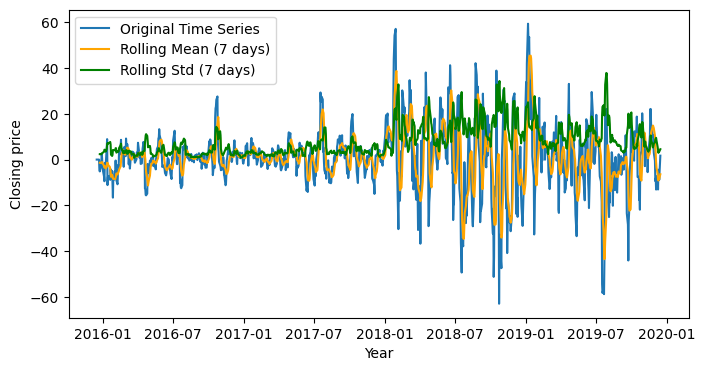

In [49]:
df_diff = df_closing.diff(5)
df_diff.fillna(0,inplace=True)
check_stationarity(df_diff)

# p value is less than 0.05  also graph shows mean and std with no trends.
# Meaning series is now stationery

In [65]:
df_diff.head(10)

,Close
Date,
2015-12-16,0.000000
2015-12-17,0.000000
2015-12-18,0.000000
2015-12-21,0.000000
2015-12-22,0.000000
2015-12-23,-4.479995
2015-12-24,-5.180000
2015-12-28,-0.909996
2015-12-29,2.490006


## Now Lets move to create ARIMA. and try to find p d q using PACF and ACF


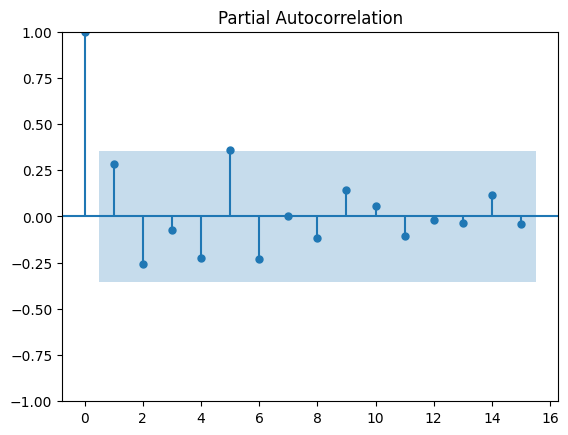

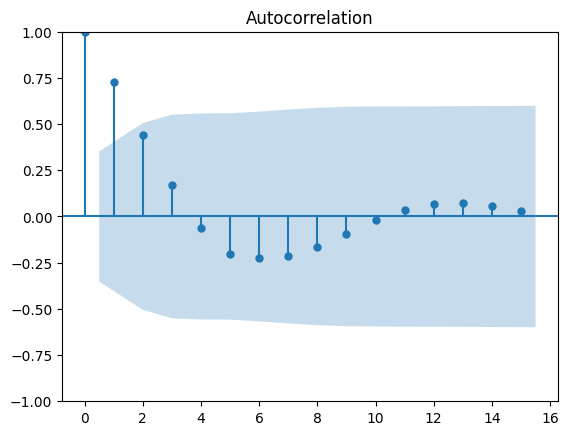

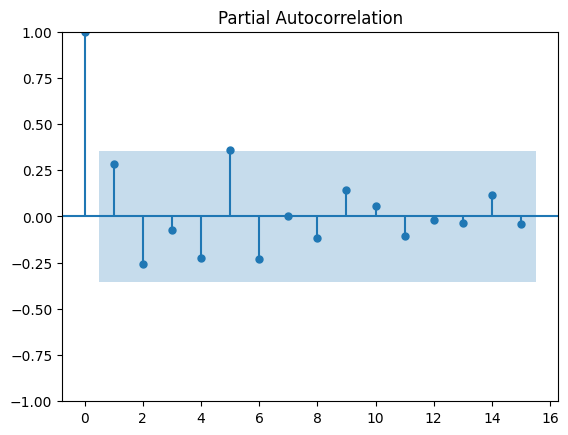

In [51]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

lag_pacf=pacf(df_diff)
lag_acf=acf(df_diff)

plot_acf(lag_acf)
plot_pacf(lag_pacf)

## AR >> From PACF graph, first zero converges at value apx 7  Hence p=7
## I  >> Differencing will take 1 for now later adjust.  d=1
## MA >>from acf graph , first zero converges at value apx 10  Hence q=10

## Lets split data in Train and Test and then build model using this p d q

In [52]:
## Train test split

split_point=len(df_diff)*0.9
split_point=round(split_point)  #Round off to nearest integer.
split_point

906

In [53]:
train=df_diff[:split_point]
test=df_diff[split_point:]
len(train),len(test)

(906, 101)

In [54]:
train.tail(10)

,Close
Date,
2019-07-11,-2.220001
2019-07-12,-7.299988
2019-07-15,-9.559998
2019-07-16,-13.940003
2019-07-17,-18.559998
2019-07-18,-54.290009
2019-07-19,-58.149994
2019-07-22,-55.980011
2019-07-23,-58.690002


## Create ARIM and Fit in

In [90]:
import statsmodels.api as sm

## TRAIN MODEL

model=sm.tsa.arima.ARIMA(train,order=(25,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  906
Model:                ARIMA(25, 0, 5)   Log Likelihood               -2919.730
Date:                Sun, 25 Feb 2024   AIC                           5903.461
Time:                        11:57:04   BIC                           6057.350
Sample:                             0   HQIC                          5962.229
                                - 906                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0845      1.114      0.973      0.330      -1.099       3.268
ar.L1          0.9082      0.559      1.626      0.104      -0.187       2.003
ar.L2         -0.0196      0.040     -0.487      0.626      -0.098       0.059
ar.L3          0.0660      0.039      1.690      0.091      -0.011       0.142
ar.L4         -0.0504      0.057     -0.891      0.373      -0.161       0.061
ar.L5         -0.0957      0.035     -2.775      0.006      -0.163      -0.028
ar.L6          0.0824      0.065      1.268      0.205      -0.045       0.210
ar.L7         -0.0225      0.038     -0.597      0.551      -0.097       0.051
ar.L8         -0.0479      0.038     -1.254      0.210      -0.123       0.027
ar.L9          0.0039      0.052      0.075      0.940      -0.098       0.105
ar.L10         0.0127      0.046      0.278      0.781      -0.077       0.103
ar.L11         0.0765      0.046      1.649      0.099      -0.014       0.167
ar.L12        -0.0332      0.045     -0.742      0.458      -0.121       0.055
ar.L13         0.0810      0.038      2.150      0.032       0.007       0.155
ar.L14        -0.0908      0.064     -1.427      0.154      -0.216       0.034
ar.L15         0.0165      0.034      0.482      0.630      -0.051       0.084
ar.L16         0.0033      0.038      0.088      0.930      -0.071       0.078
ar.L17        -0.0374      0.034     -1.087      0.277      -0.105       0.030
ar.L18         0.0822      0.038      2.144      0.032       0.007       0.157
ar.L19        -0.0509      0.048     -1.058      0.290      -0.145       0.043
ar.L20        -0.0692      0.039     -1.796      0.072      -0.145       0.006
ar.L21         0.1179      0.057      2.084      0.037       0.007       0.229
ar.L22        -0.1129      0.051     -2.212      0.027      -0.213      -0.013
ar.L23         0.0816      0.050      1.647      0.100      -0.016       0.179
ar.L24        -0.0403      0.041     -0.979      0.327      -0.121       0.040
ar.L25         0.0217      0.031      0.713      0.476      -0.038       0.082
ma.L1          0.1207      0.557      0.217      0.828      -0.971       1.212
ma.L2          0.1130      0.558      0.203      0.839      -0.980       1.206
ma.L3          0.1161      0.554      0.210      0.834      -0.969       1.201
ma.L4          0.1214      0.551      0.220      0.826      -0.958       1.201
ma.L5         -0.8720      0.551     -1.583      0.113      -1.951       0.207
sigma2        36.6410      1.137     32.226      0.000      34.413      38.869
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               929.82
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               9.69   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.95
========================================================

In [91]:
test.head()

,Close
Date,
2019-07-25,1.250000
2019-07-26,20.679993
2019-07-29,22.080017
2019-07-30,18.630005
2019-07-31,5.049988


In [92]:
## TEST
Start=split_point
End=len(df_diff)-1


pred=model.predict(start=Start,end=End,typ='levels')
pred.index=test.index
print(pred)


### here we see, Pred index is a in number form. We would need to match them test

Date
2019-07-25    -4.538319
2019-07-26     8.143664
2019-07-29    15.531806
2019-07-30    20.736182
2019-07-31    12.154708
                ...    
2019-12-10     1.076888
2019-12-11     1.079662
2019-12-12     1.076764
2019-12-13     1.083515
2019-12-16     1.082403
Name: predicted_mean, Length: 101, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


## Creating Prediction validation function so that it can be used recursively

In [94]:
def validate_prediction(pred_set,test_set):
  # Plot graph of predicted data and test data. see if both inline
  plt.figure(figsize=(8, 4))
  plt.plot(test_set,label='Test data',color='blue')
  plt.plot(pred_set,label='Predicted data',color='orange')
  plt.legend()

  # RMSE Test. Expected Err value is close to Zero.
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  rmse=sqrt(mean_squared_error(pred_set,test_set))
  print("Root mean square error is %0.4f" % rmse)

Root mean square error is 12.3245


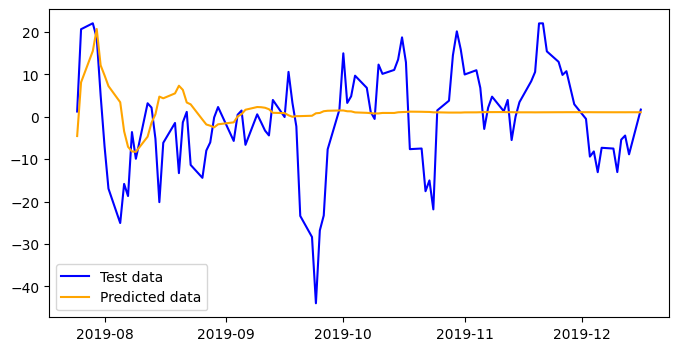

In [95]:
validate_prediction(pred,test)


The Graph doesnot look good.  Will check out with auto ARIMA

## Lets find ORDER (p,d,q) using Auto_Arima  and tune the model

In [96]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.8 MB/s eta 0:00:00


In [97]:
#### Find Order of ARIMA for this series

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

#stepwise_fit=auto_arima(train,start_p=0, d=0, start_q=0, max_p=5, max_d=5, max_q=5,trace=True,supress_warnings=True)
stepwise_fit=auto_arima(train,trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.33 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7406.169, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6458.964, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6842.861, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7409.279, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6449.960, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=6442.545, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=6387.783, Time=0.24 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=6336.260, Time=0.31 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=6256.209, Time=0.74 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=6376.575, Time=0.58 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=6188.404, Time=1.12 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  906
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -3086.036
Date:                Sun, 25 Feb 2024   AIC                           6188.072
Time:                        12:03:50   BIC                           6226.544
Sample:                             0   HQIC                          6202.764
                                - 906                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0566      0.035     -1.598      0.110      -0.126       0.013
ar.L2          0.3440      0.027     12.866      0.000       0.292       0.396
ar.L3          0.4208      0.029     14.564      0.000       0.364       0.477
ar.L4          0.0555      0.023      2.426      0.015       0.011       0.100
ar.L5         -0.4810      0.020    -23.684      0.000      -0.521      -0.441
ma.L1          1.0405      0.036     28.698      0.000       0.969       1.112
ma.L2          0.5380      0.035     15.297      0.000       0.469       0.607
sigma2        53.0605      1.487     35.690      0.000      50.147      55.974
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):               569.31
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               9.51   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### let supply this to   ARIMA(5,0,2) Let use it and build again

In [104]:
# TRAIN MODEL

model_1=sm.tsa.arima.ARIMA(train,order=(15,0,2))
model_1=model_1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  906
Model:                ARIMA(15, 0, 2)   Log Likelihood               -2975.136
Date:                Sun, 25 Feb 2024   AIC                           5988.273
Time:                        12:09:17   BIC                           6079.644
Sample:                             0   HQIC                          6023.166
                                - 906                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1087      1.062      1.044      0.296      -0.973       3.190
ar.L1         -0.5751      0.027    -21.688      0.000      -0.627      -0.523
ar.L2          0.5467      0.032     16.880      0.000       0.483       0.610
ar.L3          0.8759      0.031     27.827      0.000       0.814       0.938
ar.L4          0.0500      0.039      1.292      0.196      -0.026       0.126
ar.L5         -0.7881      0.041    -19.164      0.000      -0.869      -0.707
ar.L6         -0.4711      0.041    -11.377      0.000      -0.552      -0.390
ar.L7          0.3768      0.047      8.039      0.000       0.285       0.469
ar.L8          0.5199      0.043     12.011      0.000       0.435       0.605
ar.L9         -0.0711      0.043     -1.642      0.101      -0.156       0.014
ar.L10        -0.4566      0.044    -10.286      0.000      -0.544      -0.370
ar.L11        -0.1247      0.035     -3.593      0.000      -0.193      -0.057
ar.L12         0.2612      0.040      6.561      0.000       0.183       0.339
ar.L13         0.2643      0.031      8.457      0.000       0.203       0.326
ar.L14        -0.0547      0.028     -1.952      0.051      -0.110       0.000
ar.L15        -0.1422      0.026     -5.484      0.000      -0.193      -0.091
ma.L1          1.6130      0.006    291.912      0.000       1.602       1.624
ma.L2          0.9920      0.005    187.893      0.000       0.982       1.002
sigma2        42.1995      1.189     35.506      0.000      39.870      44.529
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               735.70
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):              10.21   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
## TEST

Start=split_point
End=len(df_diff)-1

pred_1=model_1.predict(start=Start,end=End,typ='levels')
pred_1.index=test.index
print(pred_1)


Date
2019-07-25    -8.094995
2019-07-26    -2.775186
2019-07-29     3.151005
2019-07-30    16.039375
2019-07-31    10.907481
                ...    
2019-12-10     1.109930
2019-12-11     1.109273
2019-12-12     1.108864
2019-12-13     1.109452
2019-12-16     1.109171
Name: predicted_mean, Length: 101, dtype: float64


Root mean square error is 12.6830


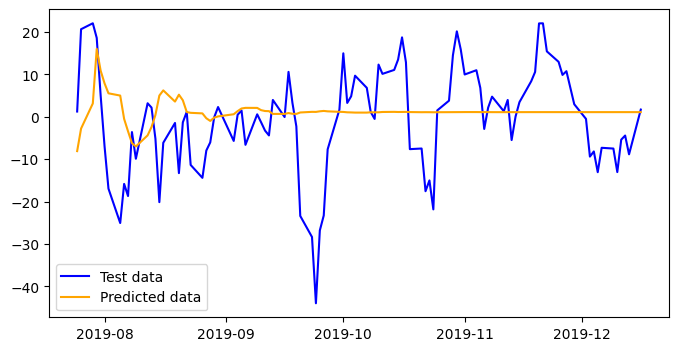

In [106]:
validate_prediction(pred_1,test)

## here Graph show  predictions are not good  with Test data. RMSE is also there.
#Unable converge


## lets move further and try to forcast

In [107]:
df_diff.tail(2)  # From these  index onwards we need to predict 2019-12-13

,Close
Date,
2019-12-13,-8.850006
2019-12-16,1.709991


In [111]:
## The B frequency (business day frequency) in pandas. This frequency excludes weekends (Saturday and Sunday)

index_future_dates=pd.date_range(start='2019-12-13',end='2020-01-13	',freq='B')

pred_future=model_1.predict(start=len(df_diff),end=len(df_diff)+21,typ='levels').rename("ARIMA Predictions")

pred_future.index=index_future_dates

print(pred_future)

2019-12-13    1.108462
2019-12-16    1.108480
2019-12-17    1.108598
2019-12-18    1.108427
2019-12-19    1.108343
2019-12-20    1.108507
2019-12-23    1.108785
2019-12-24    1.108794
2019-12-25    1.108743
2019-12-26    1.108891
2019-12-27    1.108990
2019-12-30    1.108821
2019-12-31    1.108702
2020-01-01    1.108818
2020-01-02    1.108761
2020-01-03    1.108583
2020-01-06    1.108641
2020-01-07    1.108733
2020-01-08    1.108663
2020-01-09    1.108663
2020-01-10    1.108755
2020-01-13    1.108781
Freq: B, Name: ARIMA Predictions, dtype: float64


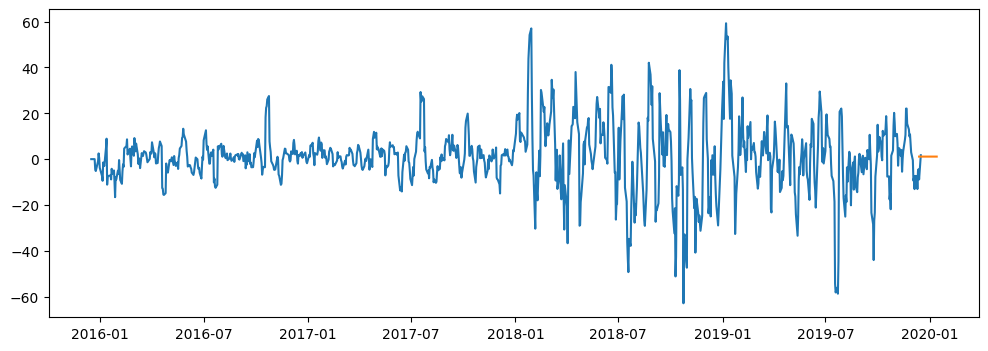

In [112]:
plt.figure(figsize=(12,4))
plt.plot(df_diff)
plt.plot(pred_future)